2015-12-17

Using this notebook to get up and running. Start with a dummy classifier, and maybe some utilities for creating submissions.

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

# nb: changed matplotlib backend to 'Agg' in matplotlibrc 
#  (issues w/ MacOSX backend in virtualenvs)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.externals import joblib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

/Users/jmontague/side-projects/christmascheer-year2/lab/tmp-venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
X_train_full = np.load('data/train-images.npy')
y_train_full = np.load('data/train-labels.npy')

------

## inspection

In [3]:
labels = pd.Series(y_train_full)

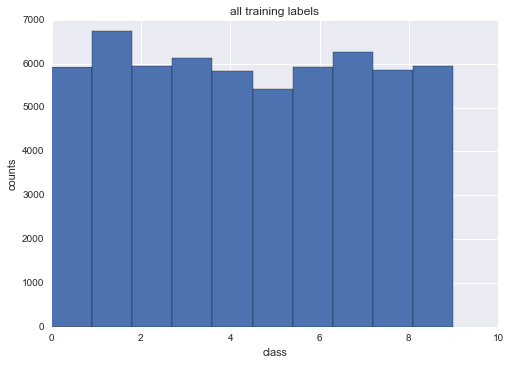

In [4]:
labels.hist()

plt.title("all training labels")
plt.xlabel("class")
plt.ylabel("counts")

Since the distribution of classes is pretty uniform, we can worry about cross-validation without stratification in later analysis steps.

----

## models

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full)

print("train size: {}".format(len(X_train)))
print("test size: {}".format(len(X_test)))

train size: 45000
test size: 15000


Start with a fake classifier...

In [6]:
clf = DummyClassifier()
clf_label = clf.__class__.__name__
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [7]:
y_pred = clf.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.1018

-----

## diagnostics

In [9]:
# c_v_p returns the array of predictions for each 
#  measurement when it was in the test fold
cv_predict = cross_val_predict(clf, X_train, y_train, cv=5)
cv_predict

array([4, 2, 4, ..., 2, 4, 2])

In [10]:
confusion_matrix(y_train, cv_predict)

array([[439, 512, 453, 430, 458, 391, 425, 487, 419, 442],
       [511, 564, 489, 533, 502, 430, 482, 554, 496, 513],
       [422, 519, 454, 451, 426, 430, 423, 467, 442, 438],
       [489, 527, 492, 476, 426, 413, 464, 458, 403, 440],
       [455, 497, 423, 446, 431, 417, 419, 442, 426, 450],
       [451, 476, 368, 422, 420, 322, 424, 449, 369, 395],
       [453, 514, 440, 433, 404, 420, 421, 454, 461, 438],
       [506, 545, 449, 438, 444, 435, 478, 515, 441, 448],
       [410, 478, 456, 454, 432, 414, 418, 436, 407, 433],
       [444, 466, 451, 487, 441, 434, 422, 466, 432, 390]])

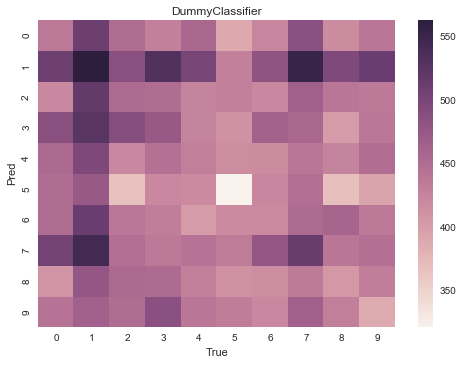

In [11]:
# should be approximately random
sb.heatmap( confusion_matrix(y_train, cv_predict))

plt.title(clf_label)
plt.xlabel("True")
plt.ylabel("Pred")

----

## scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full)

print("train size: {}".format(len(X_train)))
print("test size: {}".format(len(X_test)))

In [ ]:
scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)

In [ ]:
clf = SGDClassifier(n_jobs=-1)

# k-fold CV (cf ~85% without scaling)
scores = cross_val_score(clf, X_scaled, y_train, n_jobs=-1, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
cv_predict = cross_val_predict(clf, X_scaled, y_train, cv=3)
sb.heatmap( confusion_matrix(y_train, cv_predict))

plt.title(clf.__class__.__name__)
plt.xlabel("True")
plt.ylabel("Pred")
plt.show()

----

## image display

----

## utilities

saving predictions

In [ ]:
def create_submission(predictions, sub_name, comment=None, team='DrJ'):
    """Include the given array of image predictions in a properly-formatted 
    submission file.
    """
    now = datetime.utcnow().strftime('%Y-%m-%dT%H:%M:%S')
    submission_name = '-'.join(sub_name.split())
    with open('submissions/{}_{}.submission'.format(now, submission_name), 'w') as f:
        f.write('#'*20 + ' Generated submission file\n')
        if comment is not None:
            f.write('# ' + comment + '\n')
        f.write('{}\n'.format(team))
        f.write('{}\n'.format(now))
        f.write('{}\n'.format(sub_name))
        for p in predictions:
            f.write('{}\n'.format(p))
    return True

----------

# Model 1: Class Test Dummies

Use a ``DummyClassifier`` with "stratified" choices (ie maintain the class distribution of the training set).

In [ ]:
X_test = np.load('data/test-images.npy')

print("test size: {}".format(len(X_test)))

In [ ]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

print("target size: {}".format(len(predictions)))

In [ ]:
predictions

# Model 2: Heard It Through The Grapevine

> *Hey, I heard somewhere once that SVMs work well on the MNIST dataset.*
>
> \- the back of my brain

Use a vanilla SVM classifier, because I literally just remember hearing that is was a good and efficient model for 

In [ ]:
X_train = np.load('data/train-images.npy')
y_train = np.load('data/train-labels.npy')

X_test = np.load('data/test-images.npy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

print("train size: {}".format(len(X_train)))
print("test size: {}".format(len(X_test)))

In [ ]:
clf = SGDClassifier(n_jobs=-1)

In [ ]:
# single prediction
#clf.fit(X_train, y_train)
#accuracy_score(y_test, clf.predict(X_test))

# k-fold CV
scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
cv_predict = cross_val_predict(clf, X_train, y_train, cv=5)

In [ ]:
sb.heatmap( confusion_matrix(y_train, cv_predict))

plt.title(clf.__class__.__name__)
plt.xlabel("True")
plt.ylabel("Pred")

-----

Reset the model and fit on the entire training set.

In [ ]:
clf = SGDClassifier(n_jobs=-1)
predictions = clf.fit(X_train, y_train).predict(X_test)